# Diagram / Figures

This notebook contains diagrams and figures for the paper.

In [1]:
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy as sp
plt.style.use('ggplot')

In [41]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'figure.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)


### DE / DV Figure

In [10]:
vals_1 = np.arange(-7, 7, 0.01);
g1_pdf = stats.norm.pdf(vals_1, loc=-1, scale=1)
g2_pdf = stats.norm.pdf(vals_1, loc=3, scale=1)


vals_2 = np.arange(-12, 15, 0.01);
g3_pdf = stats.norm.pdf(vals_2, loc=0, scale=1)
g4_pdf = stats.norm.pdf(vals_2, loc=3, scale=3)

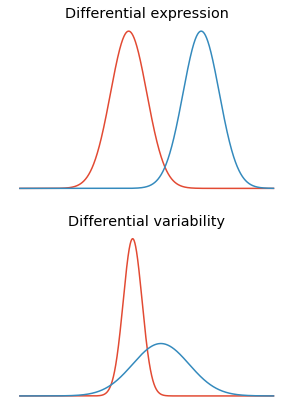

In [95]:
fig = plt.figure(figsize=(5, 7));
ax = plt.subplot(2, 1, 1)

plt.plot(vals_1, g1_pdf)
plt.plot(vals_1, g2_pdf)
plt.axis('off')
plt.title('Differential expression')

plt.subplot(2, 1, 2)
plt.plot(vals_2, g3_pdf)
plt.plot(vals_2, g4_pdf)
plt.axis('off')
plt.title('Differential variability')
plt.savefig('toy_de_dv.png')


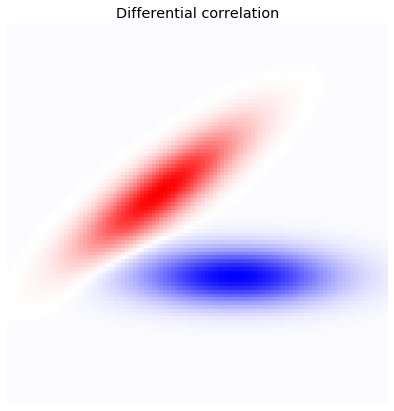

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

fig = plt.figure(figsize=(7, 7));


# create 2 kernels
m1 = (-1,-1)
s1 = [[2, -1.2], [-1.2, 1]]
k1 = multivariate_normal(mean=m1, cov=s1)

m2 = (1,1)
s2 = [[3, 0], [0, 0.2]]
k2 = multivariate_normal(mean=m2, cov=s2)

# create a grid of (x,y) coordinates at which to evaluate the kernels
xlim = (-5, 5)
ylim = (-5, 4)
xres = 100
yres = 100

x = np.linspace(xlim[0], xlim[1], xres)
y = np.linspace(ylim[0], ylim[1], yres)
xx, yy = np.meshgrid(x,y)

# evaluate kernels at grid points
xxyy = np.c_[xx.ravel(), yy.ravel()]
zz = k1.pdf(xxyy) - k2.pdf(xxyy)

# reshape and plot image
img = zz.reshape((xres,yres))
img[np.absolute(img) < 1e-3] = 0
plt.imshow(img, cmap='bwr');
plt.title('Differential correlation')
plt.axis('off');
plt.savefig('toy_dc.png')
plt.savefig('toy_dc.pdf')


plt.show()

In [97]:
img

array([[ 6.68357676e-35,  3.23898474e-34,  1.54133180e-33, ...,
         2.93205741e-05,  2.42682476e-05,  1.97238478e-05],
       [ 5.26053271e-34,  2.49967732e-33,  1.16634075e-32, ...,
         3.42181499e-05,  2.77700545e-05,  2.21301430e-05],
       [ 4.02005411e-33,  1.87301125e-32,  8.56911848e-32, ...,
         3.87723362e-05,  3.08529318e-05,  2.41078337e-05],
       ...,
       [ 1.13651709e-07,  8.16649969e-08,  5.76209925e-08, ...,
        -4.42155500e-11, -3.88418363e-11, -3.40053646e-11],
       [ 5.10732491e-08,  3.59839566e-08,  2.48948768e-08, ...,
        -1.20302420e-11, -1.05681528e-11, -9.25223738e-12],
       [ 2.22839253e-08,  1.53943782e-08,  1.04428446e-08, ...,
        -3.14070858e-12, -2.75900421e-12, -2.41546109e-12]])

In [82]:
plt.rcParams['axes.prop_cycle']

'#E24A33'
'#348ABD'
'#988ED5'
'#777777'
'#FBC15E'
'#8EBA42'
'#FFB5B8'


### True distributions

In [18]:
num_cells = 1000000

In [29]:
latent_data_1 = stats.gamma.rvs(10, 3, 1, size=num_cells)
latent_data_2 = stats.gamma.rvs(4, 2, 1, size=num_cells)
latent_data_3 = stats.gamma.rvs(2, 1, 1, size=num_cells)

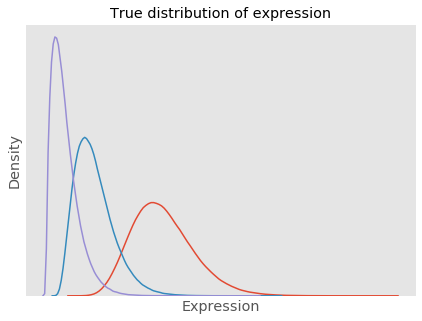

In [44]:
fig = plt.figure(figsize=(7, 5));

sns.distplot(latent_data_1, hist=False)
sns.distplot(latent_data_2, hist=False)
sns.distplot(latent_data_3, hist=False)
plt.xticks([])
plt.yticks([])
plt.xlabel('Expression');
plt.ylabel('Density');
plt.title('True distribution of expression')
plt.savefig('three_gene_true.pdf')

### Observed distribution

In [48]:
num_cells = 10000

In [49]:
latent_data_1 = stats.gamma.rvs(10, 3, 1, size=num_cells)
latent_data_2 = stats.gamma.rvs(4, 2, 1, size=num_cells)
latent_data_3 = stats.gamma.rvs(2, 1, 1, size=num_cells)

In [56]:
observed_data_1 = toy_rv().rvs(n=latent_data_1, p=0.05)
observed_data_2 = toy_rv().rvs(n=latent_data_2, p=0.05)
observed_data_3 = toy_rv().rvs(n=latent_data_3, p=0.05)

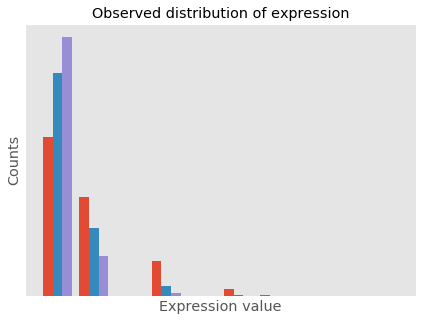

In [59]:
fig = plt.figure(figsize=(7, 5));

plt.hist([
    observed_data_1,
    observed_data_2,
    observed_data_3
])
plt.xticks([])
plt.yticks([])
plt.xlabel('Expression value');
plt.ylabel('Counts');
plt.title('Observed distribution of expression')
plt.savefig('three_gene_obs.pdf')

### True vs observed distribution

In [46]:
def generalized_binom_coef(x,y):

    return sp.special.gamma(x+1) / (sp.special.gamma(y+1) * sp.special.gamma(x-y+1))

class toy_rv(stats.rv_discrete):
    
    def _pmf(self, k, n, p):
        
        return generalized_binom_coef(n, k) * p ** (k) * (1-p)**(n-k)
        

In [140]:
latent_data = stats.gamma.rvs(5, 0, 1, size=10000)

In [141]:
observed_data = toy_rv().rvs(n=latent_data, p=0.1)

In [142]:
latent_bincounts = np.bincount(latent_data.astype(int))/10000
observed_bincounts = np.bincount(observed_data.astype(int))/10000

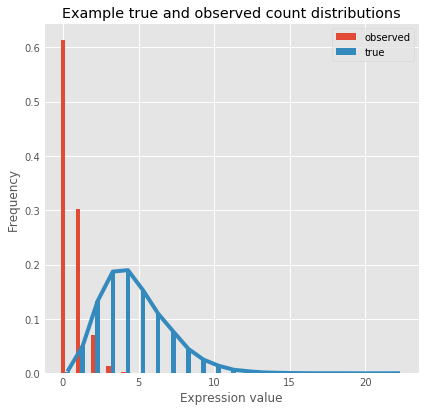

In [160]:
plt.figure(figsize=(6, 6))
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.bar(
    np.arange(observed_bincounts.shape[0]), 
    observed_bincounts, 
    width=0.3, label='observed')
plt.bar(
    np.arange(latent_bincounts.shape[0])+0.3, 
    latent_bincounts, 
    width=0.3, label='true')
plt.plot(
    np.arange(latent_bincounts.shape[0])+0.3, 
    latent_bincounts,
    color=colors[1])
plt.legend()
plt.title('Example true and observed count distributions')
plt.ylabel('Frequency')
plt.xlabel('Expression value')
plt.savefig('toy_true_observed.png')
